# **MIELAGE PREDICTION-REGRESSION ANALYSIS**

**Objective**

To develop an accurate regression model that predicts the mileage (fuel efficiency) of a vehicle based on relevant features such as cylinders,	displacement, horsepower, weight, acceleration, model year and other pertinent factors. The goal is to create a reliable model that can assist in estimating fuel consumption, enabling better understanding and optimization of vehicle performance. The model should provide insights into the key factors influencing mileage and serve as a valuable tool for automotive engineers, manufacturers, and consumers to make informed decisions regarding fuel efficiency and environmental impact.


**DATA SOURCE**

This data is taken from the StatLib Library which is maintained at Carneige Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

**Import Library**

In [134]:
import pandas as pd
import seaborn as sns

**Import Data**

In [55]:
mi=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

**Description of Data**

In [56]:
mi.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [57]:
mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [58]:
mi.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Data Visualization**


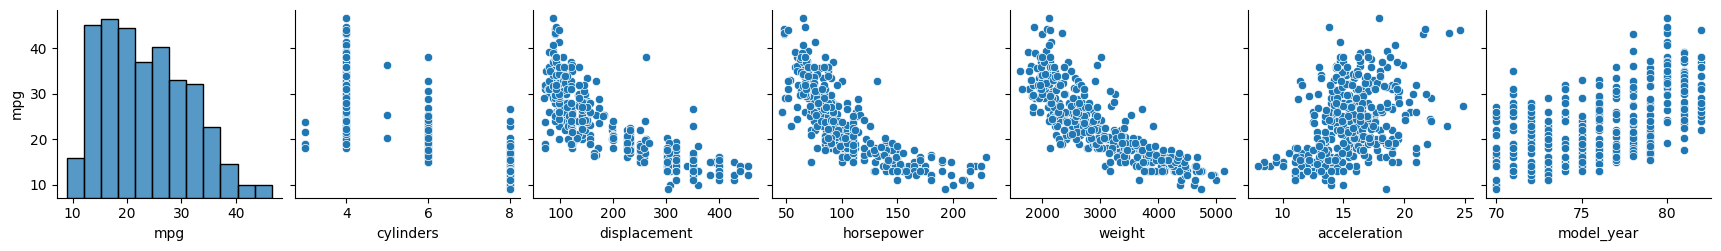

In [146]:
sns.pairplot(mi,x_vars=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

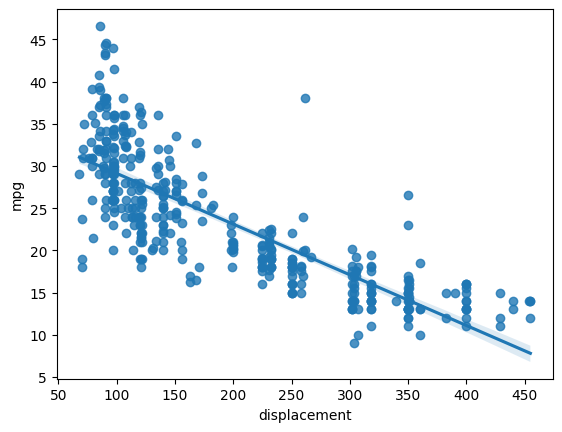

In [147]:
sns.regplot(x='displacement',y='mpg',data=mi)

**Data Preprocessing**

In [59]:
mi.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [61]:
mi.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [62]:
mi.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [96]:
mi=mi.dropna()

In [97]:
mi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [98]:
mi.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

**Define Target Variable (y) and Feature Variables (X)**

In [99]:
y=mi['mpg']
X=mi[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']]

In [100]:
y.shape

(392,)

In [101]:
X.shape

(392, 6)

**Train Test Split**

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=2529)

In [103]:
X_train.shape

(313, 6)

In [104]:
X_test.shape

(79, 6)

In [105]:
y_train.shape

(313,)

In [106]:
y_test.shape

(79,)

**Modeling**

In [112]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression()

**Model Evaluation**

In [113]:
model.fit(X_train,y_train)

LinearRegression()

In [115]:
model.coef_

array([-1.59311967e-01,  7.00157130e-03,  5.92547061e-04, -7.15525393e-03,
        1.14271259e-01,  7.77767797e-01])

In [116]:
model.intercept_

-16.55539088594234

**Prediction**

In [117]:
y_pred=model.predict(X_test)
y_pred

array([22.059036  , 18.7821421 , 12.65908885, 26.06084158, 25.91371101,
       26.99934875, 25.7631002 , 19.8754563 , 16.17363562, 11.26859106,
       25.28897677, 31.21035747, 30.97470799, 28.47283527, 16.86392606,
       17.98414023, 25.65581864, 33.14053677, 29.55163647, 31.34063062,
       15.13961799, 23.82941977, 21.70086207, 27.17018644, 24.54076571,
        9.41361112, 23.45654174, 15.60077222, 22.81680423, 18.99449614,
       23.21399942, 19.92896497,  7.1120551 , 27.4887793 , 21.13420391,
       31.3596687 , 21.74790204, 24.28380283, 11.31745378, 11.50741477,
       17.47126259, 23.38008935,  8.09752221, 20.6825964 , 21.46610687,
       29.95357239, 13.65039348, 24.34420695, 26.39738169, 20.45728571,
       17.65734388, 20.22121723, 22.38172335, 32.35848345,  7.70540842,
       12.35947753, 23.99306064, 28.51999562, 22.3582166 , 33.74992243,
       16.51210811, 28.16350291, 18.70937901, 11.75957534, 26.18370646,
       25.16448567, 19.51704292, 26.06860167, 32.62506154, 12.91

**Model Accuracy**

In [130]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,median_absolute_error,mean_absolute_percentage_error

In [120]:
mean_absolute_error(y_test,y_pred)

2.590190268572369

In [131]:
median_absolute_error(y_test,y_pred)

2.1407657107242493

In [124]:
mean_squared_error(y_test,y_pred)

10.386820967107417

In [128]:
r2_score(y_test,y_pred)

0.771880189179813

In [133]:
mean_absolute_percentage_error(y_test,y_pred)

0.1368012514633989

**Explanation**

In this Mileage Prediction project, I'm utilizing a dataset sourced from Stalibb that includes key automotive features, namely cylinders, displacement, horsepower, weight, acceleration, and model year.

1.Cylinders: The number of cylinders in the engine. Generally, more cylinders might indicate a larger and more powerful engine, but it could also impact fuel efficiency.

2.Displacement: The total volume of all the cylinders in an engine. Larger displacements usually indicate larger, more powerful engines, but they may be less fuel-efficient.

3.Horsepower: The power produced by the engine. Higher horsepower often means better performance, but it can also impact fuel consumption.

4.Weight: The weight of the vehicle. Heavier vehicles tend to have lower fuel efficiency.

5.Acceleration: The time it takes for a vehicle to go from 0 to 60 mph. Faster acceleration may suggest higher performance, but it can also influence fuel consumption.

6.Model Year: The year the vehicle was manufactured. Newer models might incorporate more fuel-efficient technologies.


These variables serve as the independent factors in my regression analysis, aiming to predict the dependent variable, which is the mileage (fuel efficiency) of vehicles. The number of cylinders and engine displacement provide insights into the engine's size and capacity, while horsepower reflects the engine's power. Weight is a crucial factor as heavier vehicles often exhibit lower fuel efficiency. Acceleration, representing the time it takes for a vehicle to accelerate, can influence both performance and fuel consumption. Additionally, the model year is considered, acknowledging that newer models may incorporate advancements in technology leading to improved fuel efficiency. By employing regression analysis on these features, my project seeks to uncover the nuanced relationships between these variables and mileage, ultimately contributing to the development of an accurate and insightful predictive model for fuel efficiency.